# Week 12 Assignment

### In this assignment, you’ll use what you’ve learned in the course to prepare data for predictive analysis in Project 4

In [90]:
# Below I imported the necessary modules

import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from pandas import read_csv
from sklearn.linear_model import LinearRegression

# Below I identify some variables

datafile = r"C:\Users\thety\Google Drive\CUNY\IS362\\Week 12\agaricus-lepiota.data"
namefile = r"C:\Users\thety\Google Drive\CUNY\IS362\\Week 12\agaricus-lepiota.txt"

# Below I load the variables and identify necessary columns

agaricus = pd.read_csv(datafile,sep=',', usecols=[0,3,5,11], names=["Poisonous","Cap-Color","Odor","Stalk-Root"])

print(agaricus)

     Poisonous Cap-Color Odor Stalk-Root
0            p         n    p          e
1            e         y    a          c
2            e         w    l          c
3            p         w    p          e
4            e         g    n          e
...        ...       ...  ...        ...
8119         e         n    n          ?
8120         e         n    n          ?
8121         e         n    n          ?
8122         p         n    y          ?
8123         e         n    n          ?

[8124 rows x 4 columns]


In [91]:
# Below I replace the column strings with numerical values

agaricus.replace(to_replace={"Poisonous":{'e': 0, 'p': 1}}, inplace=True)
agaricus.replace(to_replace={"Cap-Color":{'n': 0, 'b': 1, 'c': 2, 'g': 3, 'r': 4, 'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9}}, inplace=True)
agaricus.replace(to_replace={"Odor":{'a': 0, 'l': 1, 'c': 2, 'y': 3, 'f': 4, 'm': 5, 'n': 6, 'p': 7, 's': 8}}, inplace=True)
agaricus.replace(to_replace={"Stalk-Root":{'b': 0, 'c': 1, 'u': 2, 'e': 3, 'z': 4, 'r': 5, '?': 6}}, inplace=True)

print(agaricus)

      Poisonous  Cap-Color  Odor  Stalk-Root
0             1          0     7           3
1             0          9     0           1
2             0          8     1           1
3             1          8     7           3
4             0          3     6           3
...         ...        ...   ...         ...
8119          0          0     6           6
8120          0          0     6           6
8121          0          0     6           6
8122          1          0     3           6
8123          0          0     6           6

[8124 rows x 4 columns]


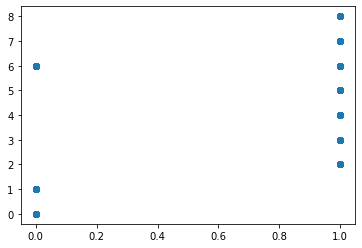

In [92]:
# Below I create a scatterplot of 

x = agaricus["Poisonous"].values
y = agaricus["Odor"].values

plt.scatter(x,y)

### As you can see above: based on odor, most mushrooms are poisonous.

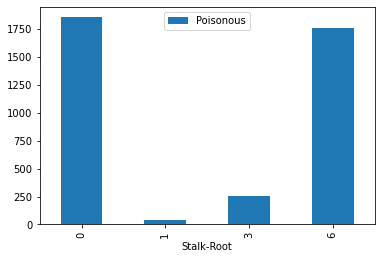

In [93]:
# Below I create a bar graph showing the amount of poisonous mushroom based on Stalk-Root

agaricus = agaricus.drop(['Cap-Color', 'Odor'], axis = 1)
agaricus.drop(agaricus[agaricus['Poisonous'] < 1].index, inplace = True)

agaricus = agaricus.groupby(['Stalk-Root']).count()

ax = agaricus.plot.bar(stacked=True)

### As you can see above: based on Stalk-Root, only types bulbous, club, equal, and missing may be poisonous. Overwhelmingly, bulbous mushrooms are poisonous.